In [11]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# DJF comaprison

In [12]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/'
efp_data = path + '/data/efp/EFP_NH_SH_PAMIP_11.csv'
nam_data = path + '/NAO/data/pamip_misc/pc1_variance_DJF.csv'

efp = pd.read_csv(efp_data)
nam = pd.read_csv(nam_data)

# Merge the DataFrames on the 'model' column
merged_df = pd.merge(nam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (DJF)
result_df = merged_df[['model', 'variance', 'NH Feedback (DJF)']]
df = result_df.rename(columns={'NH Feedback (DJF)': 'NH_Feedback_DJF'})
df

,model,variance,NH_Feedback_DJF
0,CESM2,20738.21,0.3693
1,CNRM-CM6-1,16797.78,0.2421
2,CanESM5,3485.68,0.4256
3,EC-EARTH3,52837.83,0.2945
4,FGOALS-f3-L,21184.31,0.2354
5,HadGEM3-GC31-LL,8823.29,0.2730
6,HadGEM3-GC31-MM,46447.08,0.3137
7,IPSL-CM6A-LR,9085.22,0.2719
8,MIROC6,9828.57,0.2213
9,NorESM2-LM,4271.22,0.3238


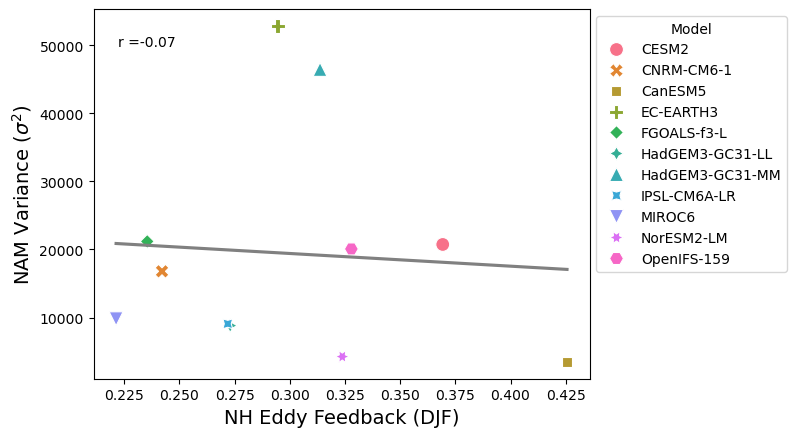

In [13]:
sns.regplot(data=df, x='NH_Feedback_DJF', y='variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, x='NH_Feedback_DJF', y='variance', hue='model', style='model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['variance'], y=df['NH_Feedback_DJF'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.ylabel('NAM Variance ($\sigma^2$)', fontsize=14)
plt.xlabel('NH Eddy Feedback (DJF)', fontsize=14)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/nam_var_DJF_vs_EFP.png')
plt.show()

# Full year variance comparison

In [14]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/'
efp_data = path + '/data/efp/EFP_NH_SH_PAMIP_11.csv'
nam_data = path + '/NAO/data/pamip_misc/pc1_variance_FY.csv'

efp = pd.read_csv(efp_data)
nam = pd.read_csv(nam_data)

# Merge the DataFrames on the 'model' column
merged_df = pd.merge(nam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (DJF)
result_df = merged_df[['model', 'variance', 'NH Feedback (DJF)']]
df = result_df.rename(columns={'NH Feedback (DJF)': 'NH_Feedback_DJF'})

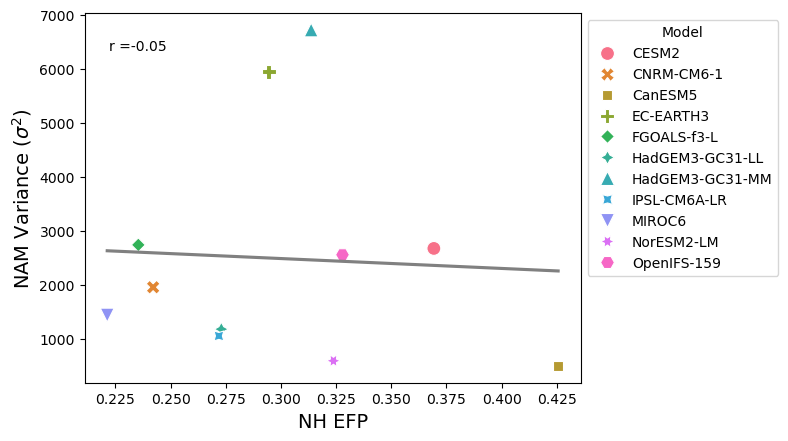

In [15]:
sns.regplot(data=df, x='NH_Feedback_DJF', y='variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, x='NH_Feedback_DJF', y='variance', hue='model', style='model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['variance'], y=df['NH_Feedback_DJF'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

# plt.title('SAM Variance (Full Year) vs SH EFP', fontsize=16)
plt.ylabel('NAM Variance ($\sigma^2$)', fontsize=14)
plt.xlabel('NH EFP', fontsize=14)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/nam_var_FY_vs_EFP.png')
plt.show()